In [204]:
### tag event - 4 for each title
### one line - numerical one for each table
### clustering
### graphs
### rule based

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from random import shuffle

In [206]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [281]:
hocky = pd.read_csv("./data/hocky.csv")
hocky = hocky[hocky.guest_count == 2]

silvester = pd.read_csv("./data/silvester.csv")
silvester = silvester[silvester.guest_count == 2]

valentine = pd.read_csv("./data/valentine.csv")
valentine = valentine[valentine.guest_count == 2]

In [282]:
print({hocky.shape}, {silvester.shape}, {valentine.shape})

{(120214, 39)} {(110156, 39)} {(52308, 39)}


In [283]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 400)

### morning date, evening date, 2 males, 2 males sports

### duration, cost, hour, weekend?, alckohol

In [284]:
valentine["ordinal_day"]=valentine["order_day_of_week"].map({k:i+1 for i,k in enumerate(["Monday",'Tuesday',"Wednesday","Thursday","Friday","Sunday"])})
valentine["weekend"]=valentine["is_weekend"].map({k:i for i,k in enumerate([False, True])})

silvester["ordinal_day"]=silvester["order_day_of_week"].map({k:i+1 for i,k in enumerate(["Monday",'Tuesday',"Wednesday","Thursday","Friday","Sunday"])})
silvester["weekend"]=silvester["is_weekend"].map({k:i for i,k in enumerate([False, True])})

hocky["ordinal_day"]=hocky["order_day_of_week"].map({k:i+1 for i,k in enumerate(["Monday",'Tuesday',"Wednesday","Thursday","Friday","Sunday"])})
hocky["weekend"]=hocky["is_weekend"].map({k:i for i,k in enumerate([False, True])})

In [285]:
## TODO: one row per table, numerical, normalization => clustering

In [286]:
# 20 features
valentine_data = valentine.groupby('order_id', as_index=False).agg({'sales_before_tax':"sum", 
'sales_inc_tax':"sum", 'guest_count':"mean",'beer_volume':"sum", 'total_orders':"mean", 
'total_orders_category_id_1.0':"mean", 'total_orders_category_id_2.0':"mean", 'total_orders_category_id_3.0':"mean",
'total_orders_category_id_4.0':"mean", 'total_orders_category_id_5.0':"mean", 'total_orders_category_id_6.0':"mean",
'total_orders':"mean", 'kids_meal':"max", 'birthday':"max", "sharable":"sum", "order_hour":"mean",
'dwell_time':'mean', 'meal_step':"max", "total_flow_steps":"mean", 'weekend':"mean", 'ordinal_day':'mean'})

In [287]:
valentine_data.set_index('order_id', inplace=True)

In [214]:
valentine_scaler = MinMaxScaler()
valentine_pca = PCA(n_components=16)
valentine_kmeans = KMeans(n_clusters=4)
valentine_pipeline = make_pipeline(valentine_scaler, valentine_pca, valentine_kmeans)

In [215]:
valentine_data1 = valentine_scaler.fit_transform(valentine_data)
valentine_data2 = valentine_pca.fit_transform(valentine_data1)
valentine_data3 = valentine_kmeans.fit_transform(valentine_data2)

In [216]:
valentine_labels=kmeans.predict(valentine_data2)

In [217]:
print(f'{list(valentine_labels).count(0)}, {list(valentine_labels).count(1)}, {list(valentine_labels).count(2)}, {list(valentine_labels).count(3)}, {list(valentine_labels).count(4)}, {list(valentine_labels).count(5)}')

1602, 2387, 4002, 2556, 0, 0


In [218]:
valentine_pca.explained_variance_ratio_.sum()

0.9999997938821438

In [219]:
valentine_pca2d = PCA(n_components=2)
valentine_pca_2d = valentine_pca2d.fit_transform(valentine_data2)

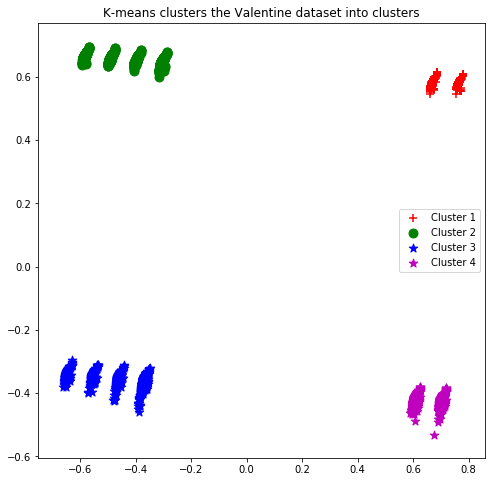

In [220]:
import pylab as pl
pl.figure(figsize=(8,8))
for i in range(0, valentine_data2.shape[0]):
    if valentine_labels[i] == 0:
        valentine_c1 = pl.scatter(valentine_pca_2d[i,0],valentine_pca_2d[i,1],c='r',marker='+', s=80)
    elif valentine_labels[i] == 1:
        valentine_c2 = pl.scatter(valentine_pca_2d[i,0],valentine_pca_2d[i,1],c='g',marker='o', s=80)
    elif valentine_labels[i] == 2:
        valentine_c3 = pl.scatter(valentine_pca_2d[i,0],valentine_pca_2d[i,1],c='b',marker='*', s=80)
    elif valentine_labels[i] == 3:
        valentine_c4 = pl.scatter(valentine_pca_2d[i,0],valentine_pca_2d[i,1],c='m',marker='*', s=80)
pl.legend([valentine_c1, valentine_c2, valentine_c3, valentine_c4],['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
pl.title('K-means clusters the Valentine dataset into clusters')
pl.show()

In [294]:
valentine_data["labels"] = valentine_labels
valentine_data.head()

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
order_id,,,,,,,,,,,,,,,,,,,,,
434397791,37.40,42.260000,2,0.000,4,0,0,4,0,0,0,0,0,0,0,0.437778,2,6,1,6,3
434398488,14.97,16.918327,2,0.000,2,0,2,0,0,0,0,0,0,0,0,0.596944,1,8,1,6,0
434398493,43.14,48.750000,2,0.000,5,0,5,0,0,0,0,0,0,0,0,0.279444,1,4,1,6,0
434398877,11.54,13.040000,2,0.682,2,2,0,0,0,0,0,0,0,0,0,0.588333,1,8,1,6,0
434398883,29.00,32.770000,2,2.364,4,4,0,0,0,0,0,0,0,0,0,0.839722,2,11,1,6,3


### tag Valentine's four clusters

    ### first: weekend, not expensive, not alcoholic, min time // 1602
    ### second: not weekend, not expensive, not alcoholic, min time // 2387
    ### third: not weekend, expensive, alcoholic, long time // 4002
    ### fourth: weekend, expensive, alcoholic, long time   //2556
    
    valentine - [1602, 2387, 4002, 2556]    //   [15, 22, 37, 24]
    silvester - [3162, 4603, 7058, 4862]    //   [16, 23, 35, 24]
    hocky     - [2702, 5334, 7920, 4203]    //   [13, 26, 39, 20]

In [276]:
valentine_data.loc[valentine_data["labels"] == 0].describe()
## cost: regular
## beer volume: low
## total orders: low

# 1. beer: low
# 2. food: mid (like others)
# 3. liquer and alcohol: low
# 4. soft drinks: low
# 5. side dishes: low
# 6. cocktails and wine: very low

# dwell_time: 1 hour
# weekend!
# lunch

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
count,1602.000000,1602.000000,1602.0,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.0,1602.0,1602.000000,1602.000000,1602.0,1602.000000,1602.0,1602.000000,1602.0
mean,37.021121,41.828118,2.0,0.123869,3.438202,0.230337,2.307740,0.187266,0.646692,0.008115,0.066167,0.007491,0.0,0.0,15.401373,0.987461,1.0,14.147316,1.0,5.417603,0.0
std,17.210570,19.456247,0.0,0.343203,1.468040,0.580769,1.148359,0.571999,0.896251,0.102725,0.305055,0.086251,0.0,0.0,4.266052,0.741546,0.0,11.144422,0.0,0.493318,0.0
min,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.184167,1.0,2.000000,1.0,5.000000,0.0
25%,27.360000,30.920000,2.0,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,12.250000,0.651736,1.0,9.000000,1.0,5.000000,0.0
50%,35.945000,40.620000,2.0,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,16.000000,0.813333,1.0,12.000000,1.0,5.000000,0.0
75%,45.960000,51.937895,2.0,0.000000,4.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,18.000000,1.059722,1.0,15.000000,1.0,6.000000,0.0
max,160.740000,181.640000,2.0,3.546000,13.000000,4.000000,10.000000,7.000000,5.000000,2.000000,4.000000,1.000000,0.0,0.0,23.000000,8.301944,1.0,124.000000,1.0,6.000000,0.0


In [277]:
valentine_data.loc[valentine_data["labels"] == 1].describe()
## cost: regular
## beer volume: low
## total orders: low

# 1. beer: low
# 2. food: mid (like others)
# 3. liquer and alcohol: low
# 4. soft drinks: low
# 5. side dishes: low
# 6. cocktails and wine: low

# dwell_time: 1 hour
# lunch

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
count,2387.000000,2387.000000,2387.0,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.0,2387.0,2387.000000,2387.000000,2387.0,2387.000000,2387.0,2387.000000,2387.0
mean,39.088309,44.158349,2.0,0.119816,3.359028,0.215333,2.295350,0.192292,0.550482,0.009636,0.105572,0.004608,0.0,0.0,16.074990,1.006998,1.0,14.290323,0.0,3.033515,1.0
std,19.044173,21.532811,0.0,0.347813,1.416481,0.539830,1.151328,0.554921,0.850686,0.105939,0.379369,0.067742,0.0,0.0,4.109746,0.918157,0.0,11.785272,0.0,1.147781,0.0
min,0.000000,0.000000,2.0,-1.182000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.190556,1.0,2.000000,0.0,1.000000,1.0
25%,26.960000,30.460000,2.0,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,13.000000,0.646250,1.0,9.000000,0.0,2.000000,1.0
50%,37.500000,42.340000,2.0,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.000000,0.827222,1.0,12.000000,0.0,3.000000,1.0
75%,49.980000,56.480000,2.0,0.000000,4.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,19.000000,1.081389,1.0,16.000000,0.0,4.000000,1.0
max,149.000000,168.370000,2.0,5.201000,12.000000,5.000000,9.000000,5.000000,4.000000,2.000000,3.000000,1.000000,0.0,0.0,23.000000,24.247778,1.0,165.000000,0.0,4.000000,1.0


In [278]:
valentine_data.loc[valentine_data["labels"] == 2].describe()

## cost: very high
## beer volume: mid
## total orders: high

# 1. beer: mid
# 2. food: mid (like others)
# 3. liquer and alcohol: high
# 4. soft drinks: high
# 5. side dishes: low
# 6. cocktails and wine: mid

# dwell_time: 1.5 hours
# evening

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
count,4002.000000,4002.000000,4002.0,4002.000000,4002.000000,4002.00000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.0,4002.000000,4002.000000,4002.0,4002.000000,4002.0,4002.000000,4002.0
mean,62.365148,70.506546,2.0,0.423591,5.838831,0.81934,3.023988,0.715642,0.934283,0.117691,0.345577,0.018491,0.005497,0.0,16.734633,1.404184,2.0,19.729635,0.0,3.057721,2.0
std,35.690905,40.551323,0.0,0.792775,2.525998,1.42954,1.728201,1.638423,1.169653,0.683941,0.779496,0.134734,0.073949,0.0,3.718681,0.984727,0.0,14.611622,0.0,1.145246,0.0
min,0.000000,0.000000,2.0,-0.414000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.213333,2.0,2.000000,0.0,1.000000,2.0
25%,41.200000,46.512871,2.0,0.000000,4.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,14.000000,0.928750,2.0,13.000000,0.0,2.000000,2.0
50%,55.455000,62.650000,2.0,0.000000,5.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,18.000000,1.178194,2.0,16.000000,0.0,4.000000,2.0
75%,74.762500,84.482500,2.0,0.591000,7.000000,1.00000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,19.000000,1.579167,2.0,22.000000,0.0,4.000000,2.0
max,447.350000,505.505018,2.0,12.775000,32.000000,13.00000,16.000000,26.000000,7.000000,9.000000,7.000000,1.000000,1.000000,0.0,23.000000,18.776389,2.0,278.000000,0.0,4.000000,2.0


In [279]:
valentine_data.loc[valentine_data["labels"] == 3].describe()
## cost: high
## beer volume: mid
## total orders: high

# 1. beer: mid
# 2. food: mid (like others)
# 3. liquer and alcohol: high
# 4. soft drinks: high
# 5. side dishes: mid
# 6. cocktails and wine: mid

# dwell_time: 1.5 hours
# weekend!
# evening
    

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
count,2556.000000,2556.000000,2556.0,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.0,2556.000000,2556.000000,2556.0,2556.000000,2556.0,2556.000000,2556.0
mean,55.744643,62.998548,2.0,0.432260,5.858764,0.873239,2.910798,0.776604,1.052426,0.048122,0.245696,0.031690,0.009781,0.0,16.232786,1.394533,2.0,19.871674,1.0,5.347809,3.0
std,28.687293,32.490371,0.0,0.795412,5.186163,1.585765,3.261209,2.044461,1.395404,0.266220,0.652469,0.175208,0.098433,0.0,4.026162,1.065058,0.0,18.684065,0.0,0.476368,0.0
min,0.000000,0.000000,2.0,-2.159000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.214167,2.0,2.000000,1.0,5.000000,3.0
25%,38.665000,43.695000,2.0,0.000000,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,13.000000,0.895556,2.0,12.000000,1.0,5.000000,3.0
50%,51.275000,57.945000,2.0,0.000000,5.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,17.000000,1.138889,2.0,16.000000,1.0,5.000000,3.0
75%,67.085000,75.807500,2.0,0.591000,7.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,19.000000,1.529306,2.0,22.000000,1.0,6.000000,3.0
max,388.880000,448.530000,2.0,10.644000,235.000000,19.000000,150.000000,50.000000,35.000000,3.000000,6.000000,1.000000,1.000000,0.0,23.000000,25.054167,2.0,382.000000,1.0,6.000000,3.0


# silvester

In [221]:
# 20 features
silvester_data = silvester.groupby('order_id', as_index=False).agg({'sales_before_tax':"sum", 
'sales_inc_tax':"sum", 'guest_count':"mean",'beer_volume':"sum", 'total_orders':"mean", 
'total_orders_category_id_1.0':"mean", 'total_orders_category_id_2.0':"mean", 'total_orders_category_id_3.0':"mean",
'total_orders_category_id_4.0':"mean", 'total_orders_category_id_5.0':"mean", 'total_orders_category_id_6.0':"mean",
'total_orders':"mean", 'kids_meal':"max", 'birthday':"max", "sharable":"sum", "order_hour":"mean",
'dwell_time':'mean', 'meal_step':"max", "total_flow_steps":"mean", 'weekend':"mean", 'ordinal_day':'mean'})

In [222]:
silvester_data.dropna(inplace=True)
silvester_data.set_index('order_id', inplace=True)

In [223]:
silvester_scaler = MinMaxScaler()
silvester_pca = PCA(n_components=16)
silvester_kmeans = KMeans(n_clusters=4)
silvester_pipeline = make_pipeline(silvester_scaler, silvester_pca, silvester_kmeans)

In [224]:
silvester_data1 = silvester_scaler.fit_transform(silvester_data)
silvester_data2 = silvester_pca.fit_transform(silvester_data1)
silvester_data3 = silvester_kmeans.fit_transform(silvester_data2)

In [225]:
silvester_labels=kmeans.predict(silvester_data2)

In [226]:
print(f'{list(silvester_labels).count(0)}, {list(silvester_labels).count(1)}, {list(silvester_labels).count(2)}, {list(silvester_labels).count(3)}, {list(silvester_labels).count(4)}, {list(silvester_labels).count(5)}')

3162, 4603, 7058, 4862, 0, 0


In [227]:
silvester_pca.explained_variance_ratio_.sum()

0.9999999251758521

In [228]:
silvester_pca2d = PCA(n_components=2)
silvester_pca_2d = silvester_pca2d.fit_transform(silvester_data2)

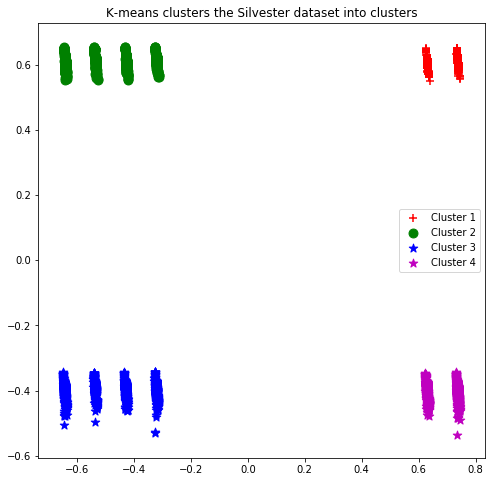

In [229]:
import pylab as pl
pl.figure(figsize=(8,8))
for i in range(0, silvester_data2.shape[0]):
    if silvester_labels[i] == 0:
        silvester_c1 = pl.scatter(silvester_pca_2d[i,0],silvester_pca_2d[i,1],c='r',marker='+', s=80)
    elif silvester_labels[i] == 1:
        silvester_c2 = pl.scatter(silvester_pca_2d[i,0],silvester_pca_2d[i,1],c='g',marker='o', s=80)
    elif silvester_labels[i] == 2:
        silvester_c3 = pl.scatter(silvester_pca_2d[i,0],silvester_pca_2d[i,1],c='b',marker='*', s=80)
    elif silvester_labels[i] == 3:
        silvester_c4 = pl.scatter(silvester_pca_2d[i,0],silvester_pca_2d[i,1],c='m',marker='*', s=80)
pl.legend([silvester_c1, silvester_c2, silvester_c3, silvester_c4],['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
pl.title('K-means clusters the Silvester dataset into clusters')
pl.show()

In [255]:
silvester_data["labels"] = silvester_labels
silvester_data.head()

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
order_id,,,,,,,,,,,,,,,,,,,,,
358742284,31.50,35.60,2,0.000,2,0,0,2,0,0,0,0,0,0,0,0.259722,1,3,1,6.0,0
358742864,39.18,44.27,2,0.000,5,0,3,0,2,0,0,0,0,0,0,0.661944,2,9,1,6.0,3
358742886,15.50,17.52,2,0.710,2,2,0,0,0,0,0,0,0,0,0,0.496111,1,7,1,6.0,0
358743383,43.35,48.98,2,0.000,5,0,3,2,0,0,0,0,0,0,0,0.525833,2,7,1,6.0,3
358743384,35.85,40.26,2,0.355,4,1,2,1,0,0,0,0,0,0,0,0.607222,1,9,1,6.0,0


In [299]:
silvester_data.loc[silvester_data["labels"] == 0].describe()
## cost: regular
## beer volume: very low
## total orders: low

# 1. beer: low
# 2. food: mid (like others)
# 3. liquer and alcohol: low
# 4. soft drinks: low
# 5. side dishes: low
# 6. cocktails and wine: very low

# dwell_time: 1 hour
# weekend!
# lunch

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
count,3162.000000,3162.000000,3162.0,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.0,3162.0,3162.000000,3162.000000,3162.0,3162.000000,3162.0,3162.000000,3162.0
mean,35.726917,40.361626,2.0,0.115073,3.463947,0.217900,2.331752,0.168880,0.681847,0.011385,0.063567,0.007274,0.0,0.0,15.592663,1.005426,1.0,14.411448,1.0,5.469007,0.0
std,16.914938,19.129298,0.0,0.339279,1.511779,0.612241,1.150903,0.509889,0.927955,0.114705,0.294537,0.084990,0.0,0.0,4.153697,0.858737,0.0,12.894477,0.0,0.499117,0.0
min,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.183611,1.0,2.000000,1.0,5.000000,0.0
25%,25.860000,29.165000,2.0,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,13.000000,0.637292,1.0,9.000000,1.0,5.000000,0.0
50%,35.200000,39.805000,2.0,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,16.000000,0.800139,1.0,11.000000,1.0,5.000000,0.0
75%,43.970000,49.690000,2.0,0.000000,4.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,19.000000,1.077431,1.0,15.000000,1.0,6.000000,0.0
max,139.810000,157.985211,2.0,4.702000,13.000000,10.000000,10.000000,3.000000,5.000000,2.000000,3.000000,1.000000,0.0,0.0,23.000000,12.252222,1.0,183.000000,1.0,6.000000,0.0


In [300]:
silvester_data.loc[silvester_data["labels"] == 1].describe()
## cost: regular
## beer volume: very low
## total orders: low

# 1. beer: low
# 2. food: mid (like others)
# 3. liquer and alcohol: low
# 4. soft drinks: low
# 5. side dishes: low
# 6. cocktails and wine: low

# dwell_time: 1 hour
# lunch

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
count,4603.000000,4603.000000,4603.0,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.0,4603.0,4603.000000,4603.000000,4603.0,4603.000000,4603.0,4603.000000,4603.0
mean,35.317625,39.897195,2.0,0.099506,3.443406,0.189659,2.358679,0.188138,0.650445,0.012383,0.056485,0.008255,0.0,0.0,15.342603,1.025473,1.0,14.567239,0.0,2.651966,1.0
std,17.636843,19.946127,0.0,0.311483,1.528948,0.520636,1.205415,0.573019,0.921349,0.120023,0.289357,0.090494,0.0,0.0,4.245884,1.034528,0.0,13.400088,0.0,1.165606,0.0
min,0.000000,0.000000,2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.185000,1.0,2.000000,0.0,1.000000,1.0
25%,25.305000,28.541269,2.0,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,13.000000,0.626250,1.0,9.000000,0.0,1.000000,1.0
50%,34.840000,39.366355,2.0,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,16.000000,0.813333,1.0,12.000000,0.0,3.000000,1.0
75%,43.830000,49.529644,2.0,0.000000,4.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,18.000000,1.067917,1.0,15.000000,0.0,4.000000,1.0
max,255.720000,288.960000,2.0,5.319000,15.000000,6.000000,12.000000,9.000000,8.000000,3.000000,7.000000,1.000000,0.0,0.0,23.000000,26.288056,1.0,153.000000,0.0,4.000000,1.0


In [301]:
silvester_data.loc[silvester_data["labels"] == 2].describe()
## cost: very high
## beer volume: mid
## total orders: high

# 1. beer: mid
# 2. food: mid (like others)
# 3. liquer and alcohol: high
# 4. soft drinks: high
# 5. side dishes: very low
# 6. cocktails and wine: mid

# dwell_time: 1.5 hours
# evening

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
count,7058.000000,7058.000000,7058.0,7058.000000,7058.000000,7058.000000,7058.000000,7058.000000,7058.000000,7058.000000,7058.000000,7058.000000,7058.000000,7058.0,7058.000000,7058.000000,7058.0,7058.000000,7058.0,7058.000000,7058.0
mean,54.221780,61.272175,2.0,0.431983,5.914565,0.854491,2.927317,0.877869,1.045197,0.031312,0.209691,0.038396,0.004392,0.0,16.319779,1.454039,2.0,20.690281,0.0,2.635166,2.0
std,30.123345,34.082971,0.0,0.936662,2.815308,1.534616,1.607501,1.930958,1.268345,0.198507,0.648262,0.192164,0.066132,0.0,4.029389,1.136457,0.0,18.922666,0.0,1.191436,0.0
min,0.000000,0.000000,2.0,-0.828000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.241667,2.0,2.000000,0.0,1.000000,2.0
25%,36.942500,41.734776,2.0,0.000000,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,14.000000,0.904722,2.0,12.000000,0.0,1.000000,2.0
50%,49.720000,56.155500,2.0,0.000000,5.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,17.000000,1.178611,2.0,16.000000,0.0,3.000000,2.0
75%,65.477500,73.987823,2.0,0.591000,7.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,19.000000,1.611319,2.0,23.000000,0.0,4.000000,2.0
max,615.880000,695.940000,2.0,43.734000,49.000000,21.000000,17.000000,33.000000,16.000000,3.000000,14.000000,1.000000,1.000000,0.0,23.000000,24.779722,2.0,387.000000,0.0,4.000000,2.0


In [302]:
silvester_data.loc[silvester_data["labels"] == 3].describe()
## cost: high
## beer volume: mid
## total orders: high

# 1. beer: mid
# 2. food: mid (like others)
# 3. liquer and alcohol: high
# 4. soft drinks: high
# 5. side dishes: low
# 6. cocktails and wine: mid

# dwell_time: 1.5 hours
# weekend!
# evening

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
count,4862.000000,4862.000000,4862.0,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.0,4862.000000,4862.000000,4862.0,4862.000000,4862.0,4862.000000,4862.0
mean,54.728023,61.854996,2.0,0.456814,5.938091,0.900658,2.908474,0.827643,1.088235,0.027355,0.213081,0.047717,0.006376,0.0,16.563143,1.427247,2.0,20.310777,1.0,5.444879,3.0
std,28.309593,32.052230,0.0,0.826968,2.851403,1.559557,1.455383,1.940992,1.297787,0.186657,0.620444,0.213189,0.079603,0.0,3.823673,1.100231,0.0,18.650773,0.0,0.497003,0.0
min,0.000000,0.000000,2.0,-0.473000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.231667,2.0,2.000000,1.0,5.000000,3.0
25%,37.970000,42.912500,2.0,0.000000,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,14.000000,0.907500,2.0,12.000000,1.0,5.000000,3.0
50%,50.440000,57.010000,2.0,0.000000,5.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,17.000000,1.163056,2.0,16.000000,1.0,5.000000,3.0
75%,65.967500,74.530000,2.0,0.591000,7.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,19.000000,1.577222,2.0,22.000000,1.0,6.000000,3.0
max,458.310000,528.610000,2.0,9.099000,48.000000,21.000000,10.000000,34.000000,10.000000,3.000000,8.000000,1.000000,1.000000,0.0,23.000000,26.038889,2.0,389.000000,1.0,6.000000,3.0


# hocky

In [230]:
# 20 features
hocky_data = hocky.groupby('order_id', as_index=False).agg({'sales_before_tax':"sum", 
'sales_inc_tax':"sum", 'guest_count':"mean",'beer_volume':"sum", 'total_orders':"mean", 
'total_orders_category_id_1.0':"mean", 'total_orders_category_id_2.0':"mean", 'total_orders_category_id_3.0':"mean",
'total_orders_category_id_4.0':"mean", 'total_orders_category_id_5.0':"mean", 'total_orders_category_id_6.0':"mean",
'total_orders':"mean", 'kids_meal':"max", 'birthday':"max", "sharable":"sum", "order_hour":"mean",
'dwell_time':'mean', 'meal_step':"max", "total_flow_steps":"mean", 'weekend':"mean", 'ordinal_day':'mean'})

In [231]:
hocky_data.dropna(inplace=True)
hocky_data.set_index('order_id', inplace=True)

In [232]:
hocky_scaler = MinMaxScaler()
hocky_pca = PCA(n_components=16)
hocky_kmeans = KMeans(n_clusters=4)
hocky_pipeline = make_pipeline(scaler, pca, kmeans)

In [233]:
hocky_data1 = hocky_scaler.fit_transform(hocky_data)
hocky_data2 = hocky_pca.fit_transform(hocky_data1)
hocky_data3 = hocky_kmeans.fit_transform(hocky_data2)

In [234]:
hocky_labels=kmeans.predict(hocky_data2)

In [235]:
print(f'{list(hocky_labels).count(0)}, {list(hocky_labels).count(1)}, {list(hocky_labels).count(2)}, {list(hocky_labels).count(3)}, {list(hocky_labels).count(4)}, {list(hocky_labels).count(5)}')

2702, 5334, 7920, 4203, 0, 0


In [236]:
hocky_pca.explained_variance_ratio_.sum()

0.9999999504493928

In [237]:
hocky_pca2d = PCA(n_components=2)
hocky_pca_2d = hocky_pca2d.fit_transform(hocky_data2)

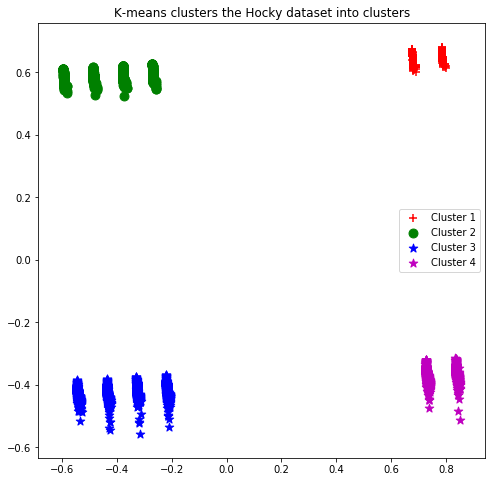

In [238]:
import pylab as pl
pl.figure(figsize=(8,8))
for i in range(0, hocky_data2.shape[0]):
    if hocky_labels[i] == 0:
        hocky_c1 = pl.scatter(hocky_pca_2d[i,0],hocky_pca_2d[i,1],c='r',marker='+', s=80)
    elif hocky_labels[i] == 1:
        hocky_c2 = pl.scatter(hocky_pca_2d[i,0],hocky_pca_2d[i,1],c='g',marker='o', s=80)
    elif hocky_labels[i] == 2:
        hocky_c3 = pl.scatter(hocky_pca_2d[i,0],hocky_pca_2d[i,1],c='b',marker='*', s=80)
    elif hocky_labels[i] == 3:
        hocky_c4 = pl.scatter(hocky_pca_2d[i,0],hocky_pca_2d[i,1],c='m',marker='*', s=80)
pl.legend([hocky_c1, hocky_c2, hocky_c3, hocky_c4],['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
pl.title('K-means clusters the Hocky dataset into clusters')
pl.show()

In [259]:
hocky_data["labels"] = hocky_labels
hocky_data.head()

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
order_id,,,,,,,,,,,,,,,,,,,,,
510839657,15.00,16.96,2,0.828,2.0,2,0,0.0,0,0,0,0,0,0,0,0.612778,1,9,0,3.0,1
510839708,11.90,13.44,2,0.828,2.0,2,0,0.0,0,0,0,0,0,0,1,0.301667,1,4,0,3.0,1
510839710,29.75,33.62,2,0.000,3.0,0,0,3.0,0,0,0,0,0,0,1,0.315000,1,4,0,3.0,1
510840996,13.70,15.48,2,0.355,2.0,1,1,0.0,0,0,0,0,0,0,0,0.944444,1,14,0,3.0,1
510841027,79.93,90.33,2,0.000,5.0,0,3,0.0,0,0,2,0,0,0,0,0.772222,1,11,0,3.0,1


In [308]:
hocky_data.loc[hocky_data["labels"] == 0].describe()
## cost: regular
## beer volume: very low
## total orders: low

# 1. beer: low
# 2. food: mid (like others)
# 3. liquer and alcohol: low
# 4. soft drinks: low
# 5. side dishes: low
# 6. cocktails and wine: very low

# dwell_time: 1 hour
# weekend!

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
count,2702.000000,2702.000000,2702.0,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.0,2702.0,2702.000000,2702.000000,2702.0,2702.000000,2702.0,2702.000000,2702.0
mean,35.435142,40.033129,2.0,0.159113,3.358623,0.277942,2.169134,0.229090,0.618061,0.013323,0.064397,0.005551,0.0,0.0,15.301258,0.983736,1.0,14.049223,1.0,5.454108,0.0
std,16.957858,19.176483,0.0,0.423429,1.445223,0.612188,1.161474,0.595924,0.892156,0.129820,0.296090,0.074315,0.0,0.0,4.567190,0.763738,0.0,11.472719,0.0,0.497982,0.0
min,0.000000,0.000000,2.0,-0.414000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.190000,1.0,2.000000,1.0,5.000000,0.0
25%,24.750000,27.900000,2.0,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,12.000000,0.629583,1.0,9.000000,1.0,5.000000,0.0
50%,34.600000,39.083506,2.0,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,16.000000,0.793750,1.0,11.000000,1.0,5.000000,0.0
75%,44.690000,50.506472,2.0,0.000000,4.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,18.000000,1.051250,1.0,15.000000,1.0,6.000000,0.0
max,132.750000,150.014702,2.0,5.319000,13.000000,6.000000,8.000000,4.000000,10.000000,2.000000,3.000000,1.000000,0.0,0.0,23.000000,9.235556,1.0,138.000000,1.0,6.000000,0.0


In [309]:
hocky_data.loc[hocky_data["labels"] == 1].describe()
## cost: regular
## beer volume: very low
## total orders: low

# 1. beer: low
# 2. food: mid (like others)
# 3. liquer and alcohol: low
# 4. soft drinks: low
# 5. side dishes: low
# 6. cocktails and wine: low

# dwell_time: 1 hour

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
count,5334.000000,5334.000000,5334.0,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.0,5334.0,5334.000000,5334.000000,5334.0,5334.000000,5334.0,5334.000000,5334.0
mean,34.672962,39.167423,2.0,0.154575,3.264717,0.273716,2.108736,0.191226,0.619798,0.009749,0.071241,0.004124,0.0,0.0,15.363330,0.992597,1.0,14.317773,0.0,2.541807,1.0
std,18.500643,20.917513,0.0,0.392220,1.412371,0.615198,1.119935,0.558075,0.881179,0.105620,0.308918,0.064096,0.0,0.0,4.151813,0.820089,0.0,14.087139,0.0,1.125883,0.0
min,0.000000,0.000000,2.0,-0.118000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.185000,1.0,2.000000,0.0,1.000000,1.0
25%,23.325000,26.268205,2.0,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,12.000000,0.633889,1.0,9.000000,0.0,2.000000,1.0
50%,34.360000,38.830000,2.0,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,16.000000,0.803889,1.0,11.000000,0.0,3.000000,1.0
75%,43.980000,49.700000,2.0,0.000000,4.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,18.000000,1.063750,1.0,15.000000,0.0,4.000000,1.0
max,559.000000,631.680000,2.0,5.083000,18.000000,5.000000,11.000000,7.000000,7.000000,2.000000,3.000000,1.000000,0.0,0.0,23.000000,13.613333,1.0,375.000000,0.0,4.000000,1.0


In [310]:
hocky_data.loc[hocky_data["labels"] == 2].describe()
## cost: very high
## beer volume: mid
## total orders: high

# 1. beer: mid
# 2. food: mid (like others)
# 3. liquer and alcohol: high
# 4. soft drinks: high
# 5. side dishes: very low
# 6. cocktails and wine: mid

# dwell_time: 1.5 hours

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
count,7920.000000,7920.000000,7920.0,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.0,7920.000000,7920.000000,7920.0,7920.000000,7920.0,7920.000000,7920.0
mean,56.492093,63.827865,2.0,0.565623,5.773864,1.067551,2.699116,0.759217,0.978157,0.055177,0.269823,0.022475,0.006566,0.0,16.161111,1.479355,2.0,20.800000,0.0,2.587374,2.0
std,31.468456,35.586010,0.0,1.027950,2.781290,1.820970,1.449403,1.720817,1.282992,0.289324,0.741529,0.148231,0.080767,0.0,3.843583,1.096606,0.0,17.560773,0.0,1.116948,0.0
min,0.000000,0.000000,2.0,-0.473000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.210278,2.0,2.000000,0.0,1.000000,2.0
25%,37.547500,42.410000,2.0,0.000000,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,13.000000,0.905556,2.0,12.000000,0.0,2.000000,2.0
50%,51.065000,57.698900,2.0,0.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,17.000000,1.183611,2.0,16.000000,0.0,3.000000,2.0
75%,69.122500,78.120000,2.0,0.887250,7.000000,2.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,19.000000,1.669583,2.0,23.000000,0.0,4.000000,2.0
max,461.100000,521.049441,2.0,21.458000,41.000000,28.000000,21.000000,29.000000,35.000000,4.000000,8.000000,1.000000,1.000000,0.0,23.000000,28.129444,2.0,393.000000,0.0,4.000000,2.0


In [311]:
hocky_data.loc[hocky_data["labels"] == 3].describe()
## cost: high
## beer volume: mid
## total orders: high

# 1. beer: mid
# 2. food: mid (like others)
# 3. liquer and alcohol: high
# 4. soft drinks: high
# 5. side dishes: low
# 6. cocktails and wine: mid

# dwell_time: 1.5 hours
# weekend!
# evening

,sales_before_tax,sales_inc_tax,guest_count,beer_volume,total_orders,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,kids_meal,birthday,sharable,order_hour,dwell_time,meal_step,total_flow_steps,weekend,ordinal_day,labels
count,4203.000000,4203.000000,4203.0,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.0,4203.000000,4203.000000,4203.0,4203.000000,4203.0,4203.000000,4203.0
mean,56.159487,63.464886,2.0,0.539521,5.971449,1.042351,2.790388,0.925291,0.998097,0.039734,0.215322,0.039734,0.009755,0.0,16.210326,1.522821,2.0,21.863193,1.0,5.389722,3.0
std,32.041156,36.223450,0.0,0.919088,2.904991,1.730983,1.527188,2.006685,1.243544,0.232101,0.646473,0.195356,0.098296,0.0,4.342162,1.335656,0.0,24.703421,0.0,0.487745,0.0
min,0.000000,0.000000,2.0,-0.473000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.193611,2.0,2.000000,1.0,5.000000,3.0
25%,38.100000,43.039075,2.0,0.000000,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,13.000000,0.904028,2.0,12.000000,1.0,5.000000,3.0
50%,50.950000,57.570000,2.0,0.000000,5.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,17.000000,1.185278,2.0,16.000000,1.0,5.000000,3.0
75%,68.645000,77.567964,2.0,0.828000,7.000000,2.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,19.000000,1.695139,2.0,24.000000,1.0,6.000000,3.0
max,670.350000,757.240000,2.0,10.402000,41.000000,22.000000,26.000000,31.000000,12.000000,6.000000,8.000000,1.000000,1.000000,0.0,23.000000,26.260278,2.0,408.000000,1.0,6.000000,3.0


## comparison - all

In [239]:
# bpgr  - v
v = [2556, 4002, 2387, 1602]

#bpgr - s
s = [4862, 7058, 4603, 3162]
#bpgr - h
h = [7920, 4203, 2702, 5334]

In [240]:
print(f'Number of Valentine\'s couple tables {sum(v)}\nNumber of Silvester\'s couple tables {sum(s)}\nNumber of Hocky\'s couple tables {sum(h)}')

Number of Valentine's couple tables 10547
Number of Silvester's couple tables 19685
Number of Hocky's couple tables 20159


In [241]:
v_precision = [int(x/sum(v)*100) for x in v]
v_precision

[24, 37, 22, 15]

In [242]:
s_precision = [int(x/sum(s)*100) for x in s]
s_precision

[24, 35, 23, 16]

In [243]:
h_precision = [int(x/sum(h)*100) for x in h]
h_precision

[39, 20, 13, 26]